# Part 3 Scratch

Iterate on the first-pass model you built in Pt. 2, using the insights you got from exploring the data at that point to guide your efforts.  

Systematically test different model types, hyperparameter settings, combinations of features, and feature engineering procedures.

 Evaluate each variation you try by measuring performance with an appropriate and consistent metric using train/test splits or cross-validation.Compare training-set performance to test-set performance to assess whether your model is underfitting or overfitting, and make it more or less complex as appropriate.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


food1 = pd.read_csv('food_coded.csv')

In [88]:
food1.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [89]:
all_cols =['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'type_sports', 'veggies_day',
       'vitamins', 'waffle_calories', 'weight']

In [90]:
feature = ''
for clmn in all_cols:
    feature = clmn
    print(food1.loc[:, feature].describe(include='all'))
    

count    125.000000
mean       3.418536
std        0.383657
min        2.200000
25%        3.200000
50%        3.500000
75%        3.700000
max        4.000000
Name: GPA, dtype: float64
count    125.000000
mean       1.392000
std        0.490161
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Gender, dtype: float64
count    125.000000
mean       1.112000
std        0.316636
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: breakfast, dtype: float64
count    125.000000
mean     577.320000
std      131.214156
min      265.000000
25%      430.000000
50%      610.000000
75%      720.000000
max      720.000000
Name: calories_chicken, dtype: float64
count    106.000000
mean       3.028302
std        0.639308
min        2.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: calories_day, dtype: float64
count    124.000000
mean     505.241935

In [91]:
food1.loc[:,['GPA', 'Gender', 'eating_changes_coded', 'eating_changes_coded1',
       'exercise','fav_cuisine_coded', 'fries', 'fruit_day',
        'healthy_feeling', 'ideal_diet_coded', 'income', 'life_rewarding', 'marital_status',
              'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out', 
              'veggies_day',
       'vitamins',]].describe(include='all')

,GPA,Gender,eating_changes_coded,eating_changes_coded1,exercise,fav_cuisine_coded,fries,fruit_day,healthy_feeling,ideal_diet_coded,income,life_rewarding,marital_status,nutritional_check,on_off_campus,parents_cook,pay_meal_out,veggies_day,vitamins
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,124.000000,124.000000,124.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,3.418536,1.392000,1.536000,4.552000,1.424000,2.424000,1.088000,4.224000,5.456000,3.704000,4.532258,5.104839,1.500000,3.152000,1.322581,1.528000,3.408000,4.008000,1.512000
std,0.383657,0.490161,0.757159,2.547788,0.795795,1.947968,0.284435,0.923388,2.585643,2.086918,1.456332,3.120399,0.548464,1.205204,0.681323,0.746778,1.040285,1.081337,0.501867
min,2.200000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,3.200000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000
50%,3.500000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,5.000000,5.000000,1.000000,3.000000,1.000000,1.000000,3.000000,4.000000,2.000000
75%,3.700000,2.000000,2.000000,5.000000,2.000000,4.000000,1.000000,5.000000,8.000000,6.000000,6.000000,8.000000,2.000000,4.000000,1.000000,2.000000,4.000000,5.000000,2.000000
max,4.000000,2.000000,4.000000,13.000000,3.000000,8.000000,2.000000,5.000000,10.000000,8.000000,6.000000,10.000000,4.000000,5.000000,4.000000,5.000000,6.000000,5.000000,2.000000


In [92]:
food1.GPA.value_counts()

3.500    13
3.000    11
3.200    10
3.700    10
3.300     9
3.400     9
3.900     7
3.600     7
3.800     6
2.800     5
4.000     4
3.415     4
3.100     3
2.900     2
2.600     2
3.830     2
3.292     1
3.904     1
2.250     1
3.350     1
3.750     1
3.790     1
3.630     1
3.870     1
3.882     1
3.680     1
2.710     1
3.890     1
3.770     1
2.400     1
3.605     1
3.920     1
3.670     1
3.730     1
3.650     1
3.654     1
2.200     1
Name: GPA, dtype: int64

In [93]:
round?


Docstring:
round(number[, ndigits]) -> number

Round a number to a given precision in decimal digits (default 0 digits).
This returns an int when called with one argument, otherwise the
same type as the number. ndigits may be negative.
Type:      builtin_function_or_method


In [94]:
for num in food1.GPA:
    num = round(num,1)
    print(num)

2.4
3.7
3.3
3.2
3.5
2.2
3.8
3.3
3.3
3.3
3.5
3.9
3.4
3.6
3.1
3.4
4.0
3.6
3.4
2.2
3.3
3.9
3.7
3.7
3.9
2.8
3.7
3.0
3.2
3.5
4.0
4.0
3.4
2.8
3.6
3.0
3.7
3.4
3.9
3.0
3.4
2.9
3.6
3.5
3.2
3.6
3.8
2.8
3.5
3.8
3.6
3.3
3.3
3.3
3.5
3.4
3.8
2.8
3.5
3.7
3.6
3.4
3.9
2.6
3.5
3.2
3.0
3.6
3.2
3.7
3.7
4.0
3.1
3.8
2.7
3.0
3.7
3.1
3.0
3.9
3.4
3.5
3.7
3.7
3.8
2.6
3.0
3.2
3.5
3.2
3.7
3.8
3.3
3.2
3.8
3.5
3.9
3.9
3.9
3.2
3.5
3.4
3.4
3.7
3.4
3.0
3.0
3.8
3.8
3.4
3.7
2.9
3.9
3.6
2.8
3.3
3.4
3.8
3.6
3.2
3.5
3.0
3.9
3.0
3.9


In [95]:
food1.GPA = food1.GPA.round(decimals=1)
food1.GPA

0      2.4
1      3.7
2      3.3
3      3.2
4      3.5
5      2.2
6      3.8
7      3.3
8      3.3
9      3.3
10     3.5
11     3.9
12     3.4
13     3.6
14     3.1
15     3.4
16     4.0
17     3.6
18     3.4
19     2.2
20     3.3
21     3.9
22     3.7
23     3.7
24     3.9
25     2.8
26     3.7
27     3.0
28     3.2
29     3.5
      ... 
95     3.5
96     3.9
97     3.9
98     3.9
99     3.2
100    3.5
101    3.4
102    3.4
103    3.7
104    3.4
105    3.0
106    3.0
107    3.8
108    3.8
109    3.4
110    3.7
111    2.9
112    3.9
113    3.6
114    2.8
115    3.3
116    3.4
117    3.8
118    3.6
119    3.2
120    3.5
121    3.0
122    3.9
123    3.0
124    3.9
Name: GPA, Length: 125, dtype: float64

In [96]:
food1.GPA.value_counts()

3.4    14
3.7    14
3.5    13
3.9    12
3.8    11
3.0    11
3.3    10
3.6    10
3.2    10
2.8     5
4.0     4
3.1     3
2.6     2
2.9     2
2.2     2
2.4     1
2.7     1
Name: GPA, dtype: int64

In [97]:
food1.weight.head()

0                         187
1                         155
2    I'm not answering this. 
3               Not sure, 240
4                         190
Name: weight, dtype: object

In [98]:
food1 = food1.drop(index=2)

In [99]:
food1.weight.head()

0              187
1              155
3    Not sure, 240
4              190
5              190
Name: weight, dtype: object

In [100]:
food1 = food1.replace(food1.loc[3,'weight'], value=240)

In [101]:
food1.loc[61:71, 'weight']

61        118
62        210
63        180
64        140
65        112
66        125
67    144 lbs
68        145
69        130
70        140
71        140
Name: weight, dtype: object

In [102]:
food1 = food1.replace(food1.loc[67,'weight'], value=144)

In [103]:
food1.loc[67, 'weight']

144

In [104]:
food1.loc[71:81, 'weight']

71    140
72    140
73    200
74    NaN
75    120
76    150
77    200
78    135
79    145
80    130
81    190
Name: weight, dtype: object

In [105]:
food1 = food1.drop(index=74)

In [106]:
food1.loc[71:81, 'weight']

71    140
72    140
73    200
75    120
76    150
77    200
78    135
79    145
80    130
81    190
Name: weight, dtype: object

In [107]:
food1.loc[31:41, 'weight']

31    205
32    NaN
33    128
34    150
35    150
36    150
37    170
38    150
39    175
40    140
41    120
Name: weight, dtype: object

In [108]:
food1 =food1.drop(index=32)

In [109]:
food1 = food1.astype({'weight': 'int64'})

In [110]:
food1.shape

(122, 61)

In [111]:
pd.Series(food1.columns)

0                              GPA
1                           Gender
2                        breakfast
3                 calories_chicken
4                     calories_day
5                   calories_scone
6                           coffee
7                     comfort_food
8             comfort_food_reasons
9       comfort_food_reasons_coded
10                            cook
11    comfort_food_reasons_coded.1
12                         cuisine
13                    diet_current
14              diet_current_coded
15                           drink
16                  eating_changes
17            eating_changes_coded
18           eating_changes_coded1
19                      eating_out
20                      employment
21                     ethnic_food
22                        exercise
23                father_education
24               father_profession
25                     fav_cuisine
26               fav_cuisine_coded
27                        fav_food
28                  

In [112]:
food1.isna().sum()

GPA                              0
Gender                           0
breakfast                        0
calories_chicken                 0
calories_day                    19
calories_scone                   1
coffee                           0
comfort_food                     0
comfort_food_reasons             0
comfort_food_reasons_coded      19
cook                             3
comfort_food_reasons_coded.1     0
cuisine                         16
diet_current                     0
diet_current_coded               0
drink                            2
eating_changes                   2
eating_changes_coded             0
eating_changes_coded1            0
eating_out                       0
employment                       9
ethnic_food                      0
exercise                         0
father_education                 1
father_profession                3
fav_cuisine                      1
fav_cuisine_coded                0
fav_food                         1
food_childhood      

In [113]:
#I am dropping columns that have a lot of NaN values or that are redundant.
food1= food1.drop(['calories_day', 'type_sports', 'cuisine','eating_changes_coded', 'comfort_food_reasons_coded'], axis='columns')


In [114]:
food1.isna().sum()

GPA                             0
Gender                          0
breakfast                       0
calories_chicken                0
calories_scone                  1
coffee                          0
comfort_food                    0
comfort_food_reasons            0
cook                            3
comfort_food_reasons_coded.1    0
diet_current                    0
diet_current_coded              0
drink                           2
eating_changes                  2
eating_changes_coded1           0
eating_out                      0
employment                      9
ethnic_food                     0
exercise                        0
father_education                1
father_profession               3
fav_cuisine                     1
fav_cuisine_coded               0
fav_food                        1
food_childhood                  0
fries                           0
fruit_day                       0
grade_level                     0
greek_food                      0
healthy_feelin

In [115]:
food1 = food1.select_dtypes('number')

In [116]:
food1.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_scone',
       'coffee', 'cook', 'comfort_food_reasons_coded.1', 'diet_current_coded',
       'drink', 'eating_changes_coded1', 'eating_out', 'employment',
       'ethnic_food', 'exercise', 'father_education', 'fav_cuisine_coded',
       'fav_food', 'fries', 'fruit_day', 'grade_level', 'greek_food',
       'healthy_feeling', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status', 'mother_education',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'veggies_day', 'vitamins',
       'waffle_calories', 'weight'],
      dtype='object')

In [117]:
food1.shape

(122, 45)

In [118]:
#food1 = food1.drop('drink', axis='columns')

In [119]:
food1 = food1.dropna()

In [120]:
food1.shape

(100, 45)

In [121]:
X = food1.drop('diet_current_coded', axis='columns')
y = food1.loc[:, 'diet_current_coded']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

rfc = RandomForestClassifier(n_estimators=700, max_depth=3,random_state=21)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.8533333333333334
0.72


In [122]:
X = food1.drop('diet_current_coded', axis='columns')
y = food1.loc[:, 'diet_current_coded']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

rfc = RandomForestClassifier(n_estimators=100, max_depth=3,random_state=21, oob_score=True)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))#rfc.score returns the mean accuracy on the given test data and labels.
print(rfc.oob_score_)

0.8533333333333334
0.76
0.5333333333333333


In [123]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=21, verbose=0,
                       warm_start=False)>

In [124]:
y_pred = rfc.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.describe()

,Actual,Predicted
count,25.000000,25.000000
mean,1.600000,1.680000
std,0.707107,0.476095
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,4.000000,2.000000


In [86]:
true = np.array(y_test)
pred = np.array(y_pred)
n = len(true)

mae = sum(abs(true - pred))/n
mse = sum((true - pred)**2)/n
rmse = np.sqrt(mse)
mae, mse, rmse 

(0.32, 0.56, 0.7483314773547883)

In [85]:
from sklearn import metrics
np.testing.assert_almost_equal(mae, metrics.mean_absolute_error(true, pred))
np.testing.assert_almost_equal(mse, metrics.mean_squared_error(true, pred))
np.testing.assert_almost_equal(rmse, np.sqrt(metrics.mean_squared_error(true, pred)))

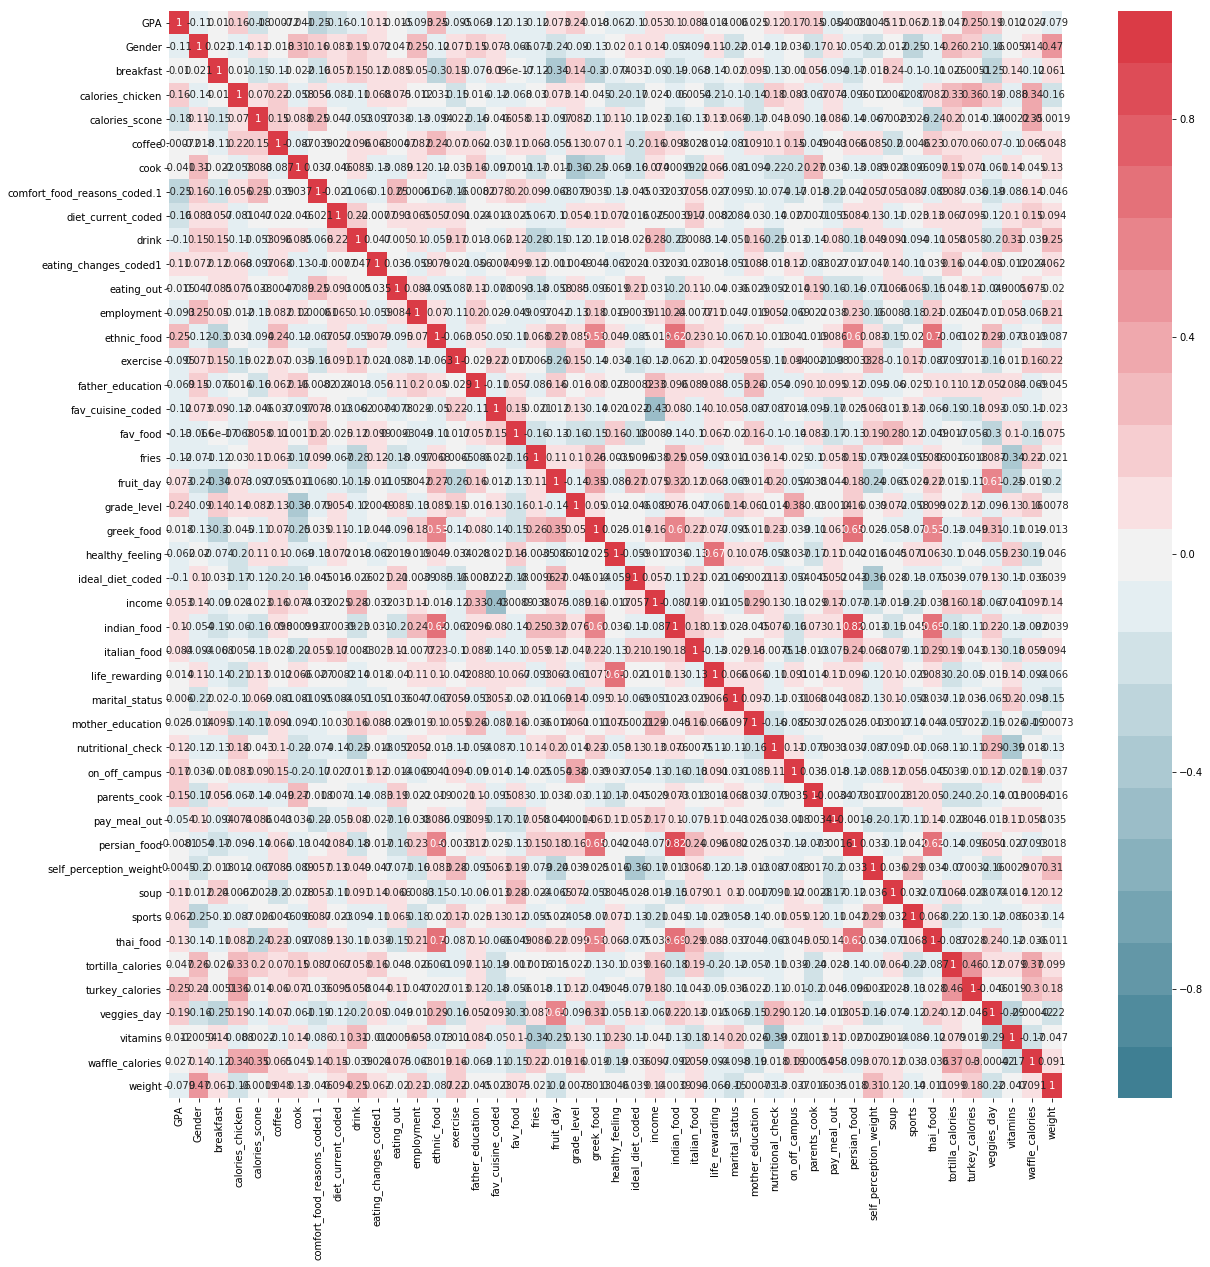

In [41]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(food1.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            annot=True,
            ax=ax
            );

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', multi_class='auto')#passed a solver and multi_class just to silence warnings

In [71]:
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.6266666666666667
0.64


C:\Users\lacey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [43]:
#I want to see if any single column is a best predictor, this model uses logistic regression
target_col = 'diet_current_coded'
col_iter = food1.drop(['diet_current_coded'], axis='columns') 

for col in col_iter:
    X = food1.loc[:, [col]]
    y = food1.loc[:, target_col]
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=21)
    lr.fit(X_train, y_train)
    print(col)
    print(lr.score(X_train, y_train))
    print(lr.score(X_test, y_test))

GPA
0.4533333333333333
0.48
Gender
0.52
0.4
breakfast
0.5066666666666667
0.48
calories_chicken
0.4533333333333333
0.48
calories_scone
0.52
0.48
coffee
0.4533333333333333
0.48
cook
0.49333333333333335
0.4
comfort_food_reasons_coded.1
0.49333333333333335
0.4
drink
0.6133333333333333
0.76
eating_changes_coded1
0.4533333333333333
0.48
eating_out
0.48
0.56
employment
0.4666666666666667
0.36
ethnic_food
0.49333333333333335
0.56
exercise
0.5866666666666667
0.6
father_education
0.48
0.4
fav_cuisine_coded
0.4533333333333333
0.52
fav_food
0.4533333333333333
0.48
fries
0.5066666666666667
0.52
fruit_day
0.56
0.56
grade_level
0.48
0.52
greek_food
0.48
0.48
healthy_feeling
0.4533333333333333
0.48
ideal_diet_coded
0.4666666666666667
0.44
income
0.4533333333333333
0.48
indian_food
0.4666666666666667
0.6
italian_food
0.44
0.6
life_rewarding
0.48
0.6
marital_status
0.4666666666666667
0.32
mother_education
0.48
0.6
nutritional_check
0.6
0.64
on_off_campus
0.48
0.4
parents_cook
0.49333333333333335
0.48
pa

C:\Users\lacey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [44]:
#I want to see if any single column is a best predictor, using a Random Forest Classifier
target_col = 'diet_current_coded'
col_iter = food1.drop(['diet_current_coded'], axis='columns') 

for col in col_iter:
    X = food1.loc[:, [col]]
    y = food1.loc[:, target_col]
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=21)
    rfc.fit(X_train, y_train)
    print(col)
    print(rfc.score(X_train, y_train))
    print(rfc.score(X_test, y_test))

GPA
0.6266666666666667
0.6
Gender
0.52
0.4
breakfast
0.5066666666666667
0.48
calories_chicken
0.4666666666666667
0.32
calories_scone
0.5466666666666666
0.52
coffee
0.4533333333333333
0.48
cook
0.56
0.48
comfort_food_reasons_coded.1
0.52
0.44
drink
0.6133333333333333
0.76
eating_changes_coded1
0.68
0.52
eating_out
0.5066666666666667
0.56
employment
0.4666666666666667
0.36
ethnic_food
0.49333333333333335
0.64
exercise
0.5866666666666667
0.6
father_education
0.52
0.44
fav_cuisine_coded
0.5066666666666667
0.56
fav_food
0.4533333333333333
0.48
fries
0.5066666666666667
0.52
fruit_day
0.56
0.56
grade_level
0.49333333333333335
0.4
greek_food
0.5066666666666667
0.52
healthy_feeling
0.5733333333333334
0.48
ideal_diet_coded
0.52
0.4
income
0.5466666666666666
0.52
indian_food
0.5066666666666667
0.44
italian_food
0.48
0.6
life_rewarding
0.6
0.76
marital_status
0.4666666666666667
0.32
mother_education
0.5333333333333333
0.48
nutritional_check
0.6
0.52
on_off_campus
0.48
0.32
parents_cook
0.493333333

In [130]:
X = food1.loc[:, ['weight','GPA']]
y = food1.loc[:, 'diet_current_coded']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=21)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))#using only the individual high performers with RFC reduces prediction accuracy

0.68
0.48


In [45]:
from sklearn.model_selection import GridSearchCV, KFold

In [132]:
rfc_kf = RandomForestClassifier(n_estimators=100)
kf = KFold(n_splits=100, shuffle=True)

rfc_grid = GridSearchCV(estimator=rfc_kf, param_grid={}, cv=kf, return_train_score=True)
rfc_grid.fit(X, y)
results = rfc_grid.cv_results_
print('train_score', results['mean_train_score'][0])
print('test_score', results['mean_test_score'][0])

train_score 0.9109090909090907
test_score 0.41


In [ ]:
pd.Series(results)

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dtc = DecisionTreeClassifier()
kf = KFold(n_splits=10, shuffle=True, random_state=2)

grid = GridSearchCV(estimator=dtc,
                    param_grid={},
                    return_train_score=True,
                    cv=kf,
                   )
grid.fit(X, y)
grid.cv_results_['mean_train_score'][0], grid.cv_results_['mean_test_score'][0]

(1.0, 0.52)

In [73]:
#!conda install -y graphviz

Solving environment: ...working... done

# All requested packages already installed.



In [62]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

0.7733333333333333
0.6


In [63]:
dtc.fit(X,y)
dtc.score(X,y)

0.78

In [64]:
images_dir = 'images'
dotfile_path = f'{images_dir}/food4_tree.dot'
png_path = f'{images_dir}/food4_tree.png'

In [65]:
from sklearn.tree import export_graphviz

export_graphviz(dtc, out_file=dotfile_path, feature_names=X.columns)

In [66]:
# Convert the graphviz file to PNG
!dot -Tpng {dotfile_path} -o {png_path}

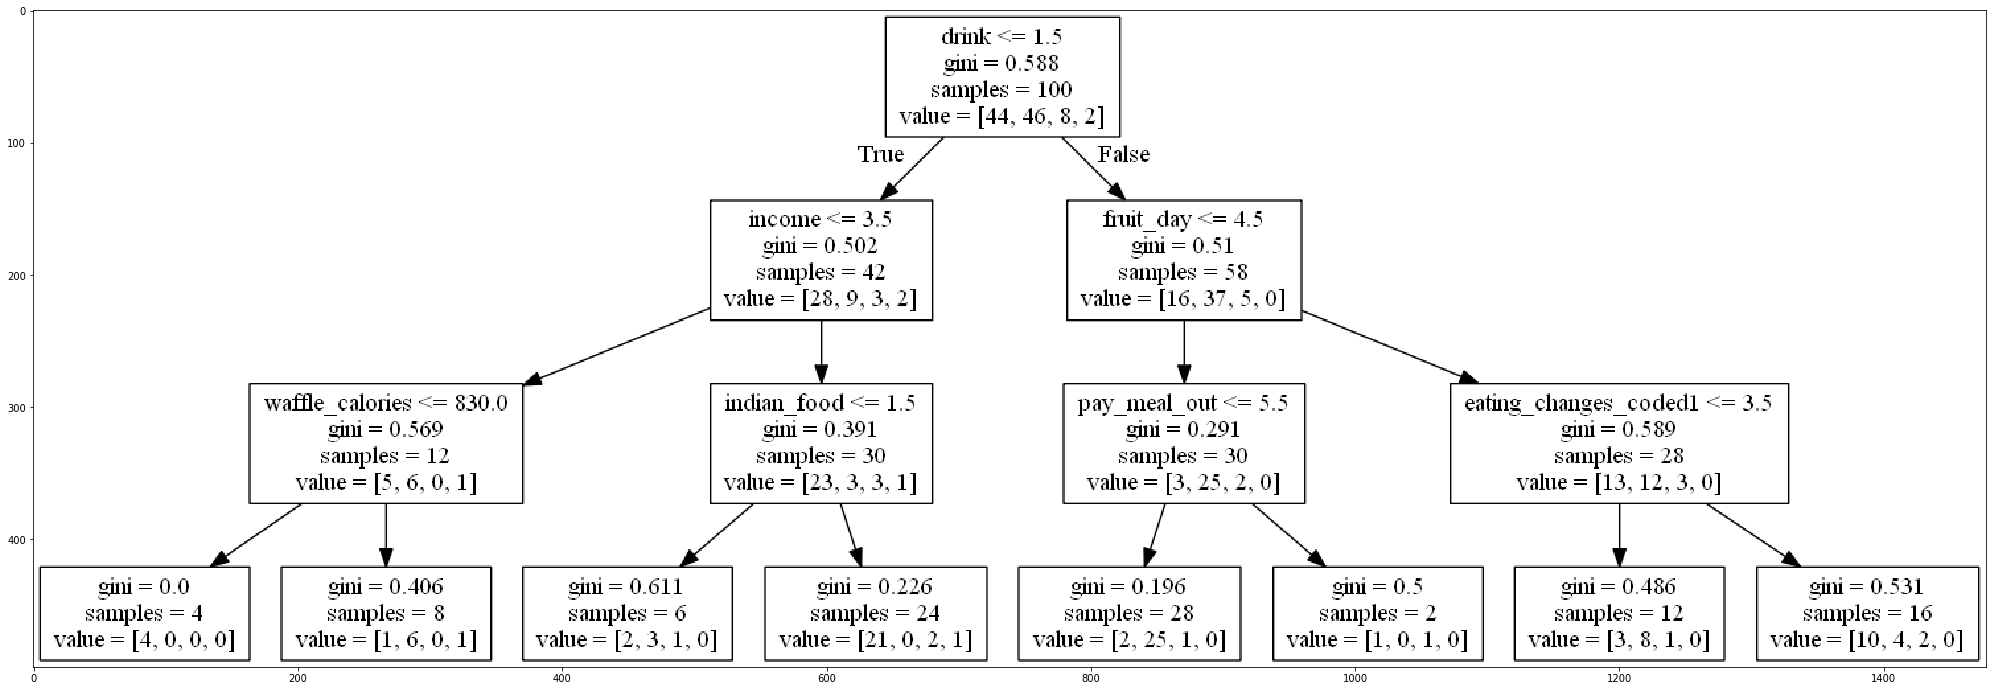

In [67]:
tree_image = plt.imread(png_path)
fig, ax = plt.subplots(figsize=(35, 30))
ax.imshow(tree_image);

In [136]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)#now I will automate the process to find the best max_depth

max_depth_range = range(1, 30)

from sklearn.metrics.scorer import make_scorer

def neg_rmse(y_test, y_pred):
    squared_errors = (y_test-y_pred)**2
    mse = squared_errors.mean()
    rmse = np.sqrt(mse)
    return -rmse
neg_rmse_scorer = make_scorer(neg_rmse)

Text(0, 0.5, 'RMSE, lower is better')

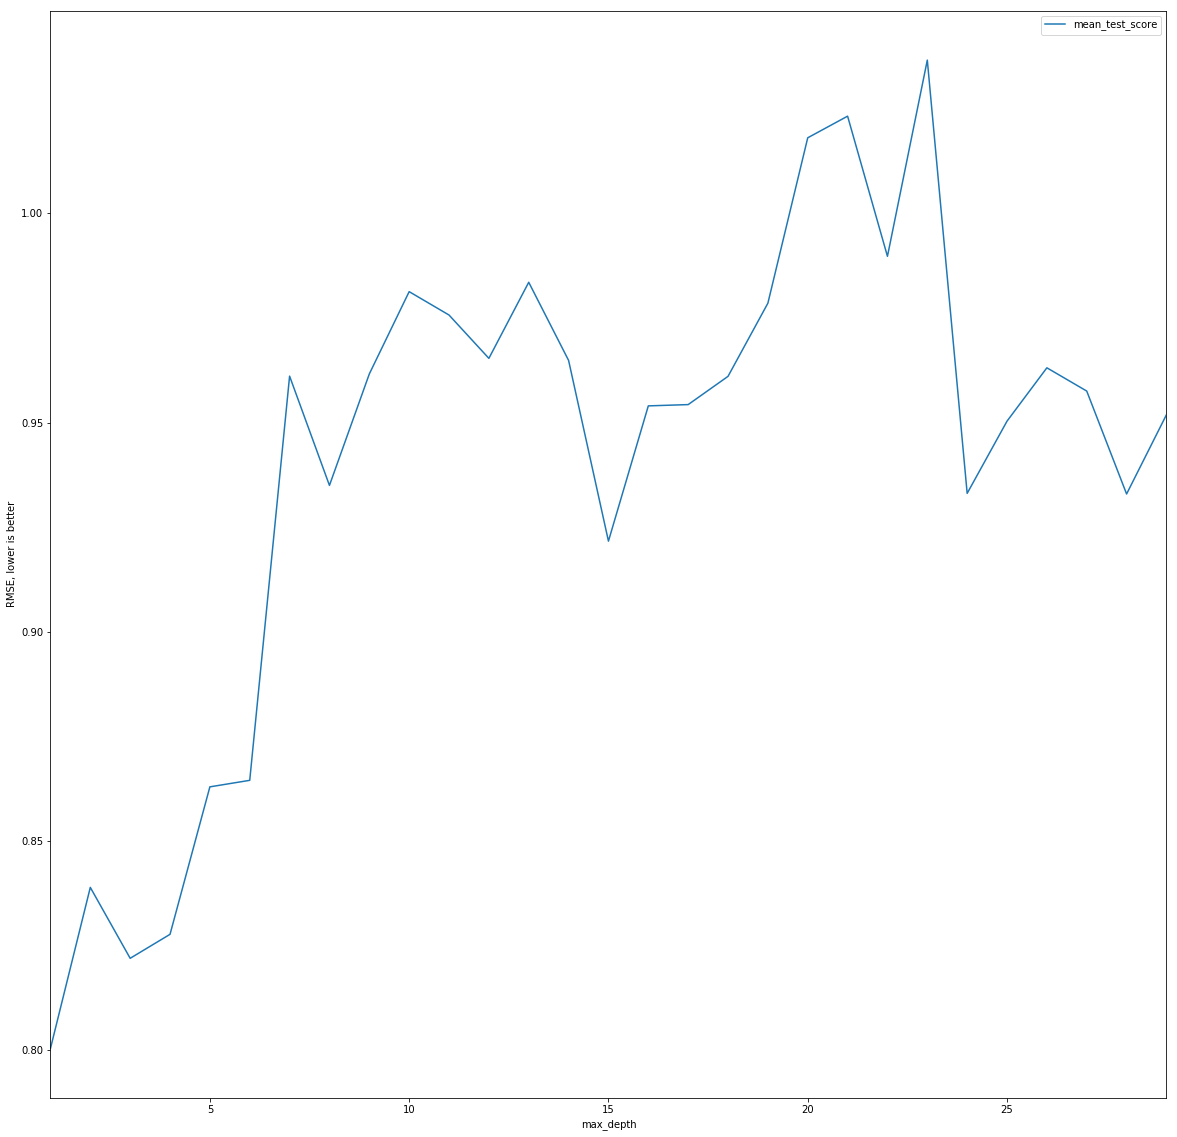

In [137]:
kf=KFold(10, shuffle=True)

grid =GridSearchCV(
    estimator=rfc,
    param_grid={'max_depth' : max_depth_range},
    cv=kf,
    return_train_score = True,
    scoring = neg_rmse_scorer
)

grid.fit(X,y)
scores = -pd.DataFrame(grid.cv_results_).loc[:, ['mean_test_score']]
scores.index = max_depth_range
ax = scores.plot(figsize=(20,20))
ax.set_xlabel('max_depth')
ax.set_ylabel('RMSE, lower is better')

In [138]:
food1.diet_current_coded.value_counts()

2    46
1    44
3     8
4     2
Name: diet_current_coded, dtype: int64